# Data Cleaning and preparation

In [3]:
#import data
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from scipy.cluster import hierarchy
%matplotlib inline
from datetime import datetime

In [4]:
#load dataset
import pandas as pd
data = pd.read_csv(r"C:\Users\ACER\Downloads\customer_analysis.csv", sep='\t')
data.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
#Missing values
data.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [7]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_7616\825795003.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
C:\Users\ACER\AppData\Local\Temp\ipykernel_7616\825795003.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
C:\Users\ACER\AppData\Local\Temp\ipykernel_7616\825795003.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
C:\Users\ACER\AppData\Local\Temp\ipykernel_7616\825795003.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_da

In [8]:
label_encoder = LabelEncoder()
#categorical_columns = ['Education', 'Marital_Status']
#df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)
data['Education_encoding'] = label_encoder.fit_transform(data['Education'])
data['Marital_Status_encoding'] = label_encoder.fit_transform(data['Marital_Status'])
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_encoding,Marital_Status_encoding
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,2,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,2,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2,5
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,2,5
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,4,3


# Feature Engineering

In [9]:
#Age Extraction (GESER DATA KE KANAN DIPALING UJUNG ADA KOLOM AGE)
df = pd.DataFrame(data)
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Year_Birth']
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_encoding,Marital_Status_encoding,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,2,4,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,2,4,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2,5,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,2,5,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,4,3,42


In [10]:
#Household Living Arrangement
df = pd.DataFrame(data)
df['Household Living Arrangement'] = df['Marital_Status'].apply(lambda status: 'With Couple' if status == 'Married' else 'With Big Family' if status == 'together' else 'Alone' if status in ['Single', 'YOLO'] else 'Other')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_encoding,Marital_Status_encoding,Age,Household Living Arrangement
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,3,11,1,2,4,66,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,3,11,0,2,4,69,Alone
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,2,5,58,Other
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,3,11,0,2,5,39,Other
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,4,3,42,With Couple


In [11]:
#Spending Power (GESER DATA KE KANAN DIPALING UJUNG ADA DISAMPING KOLOM AGE
df = pd.DataFrame(data)
df['Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_encoding,Marital_Status_encoding,Age,Household Living Arrangement,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,2,4,66,Alone,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,2,4,69,Alone,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2,5,58,Other,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,2,5,39,Other,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,4,3,42,With Couple,422


In [12]:
#Family Dynamics
df = pd.DataFrame(data)
df['Children'] = df[['Kidhome', 'Teenhome']].sum(axis=1)
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_encoding,Marital_Status_encoding,Age,Household Living Arrangement,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,2,4,66,Alone,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,2,4,69,Alone,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2,5,58,Other,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,2,5,39,Other,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,4,3,42,With Couple,1
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,3,11,0,3,5,56,Other,1
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,3,11,0,2,2,52,Other,1
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,0,0,3,11,0,4,3,38,With Couple,1
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,0,3,11,1,4,5,49,Other,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,0,3,11,0,4,5,73,Other,2


In [13]:
#family unity
df['Family Unity'] = df[['Children']].sum(axis=1) + df['Marital_Status'].apply(lambda status: 2 if status == 'Married' else 1 if status in ['Single', 'YOLO', 'Divorced'] else 4 if status == 'Together' else 0)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Education_encoding,Marital_Status_encoding,Age,Household Living Arrangement,Children,Family Unity
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,2,4,66,Alone,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,2,4,69,Alone,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,2,5,58,Other,0,4
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,2,5,39,Other,1,5
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,4,3,42,With Couple,1,3


In [14]:
#parental status, asumsi jika ia married/divorced dan memiliki children maka "is parent"
df['Parental Status'] = df.apply(lambda row: 'Is Parent' if (row['Children'] > 0) and (row['Marital_Status'] in ['Married', 'Together', 'Divorced']) else 'Not Parent', axis=1)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Education_encoding,Marital_Status_encoding,Age,Household Living Arrangement,Children,Family Unity,Parental Status
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,3,11,1,2,4,66,Alone,0,1,Not Parent
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,3,11,0,2,4,69,Alone,2,3,Not Parent
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,2,5,58,Other,0,4,Not Parent
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,3,11,0,2,5,39,Other,1,5,Is Parent
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,4,3,42,With Couple,1,3,Is Parent


In [15]:
#Educational Evolution
import pandas as pd
df['Educational Evolution'] = df['Education'].apply(lambda education: 'Advanced Degree' if education in ['PhD', 'Master'] else "Bachelor's Degree" if education in ['2n Cycle', 'Graduation'] else 'High School')
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Education_encoding,Marital_Status_encoding,Age,Household Living Arrangement,Children,Family Unity,Parental Status,Educational Evolution
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,11,1,2,4,66,Alone,0,1,Not Parent,Bachelor's Degree
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,11,0,2,4,69,Alone,2,3,Not Parent,Bachelor's Degree
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,2,5,58,Other,0,4,Not Parent,Bachelor's Degree
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,11,0,2,5,39,Other,1,5,Is Parent,Bachelor's Degree
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,4,3,42,With Couple,1,3,Is Parent,Advanced Degree
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,11,0,3,5,56,Other,1,5,Is Parent,Advanced Degree
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,11,0,2,2,52,Other,1,2,Is Parent,Bachelor's Degree
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,11,0,4,3,38,With Couple,1,3,Is Parent,Advanced Degree
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,11,1,4,5,49,Other,1,5,Is Parent,Advanced Degree
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,11,0,4,5,73,Other,2,6,Is Parent,Advanced Degree


In [16]:
# 8. Farewell to Redundancy
redundant_features = ['ID', 'AcceptedCmp1', 'AcceptedCmp5', 'Complain', 'Z_Revenue', 'Response'] 
data.drop(columns=redundant_features, inplace=True)
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp2,Z_CostContact,Education_encoding,Marital_Status_encoding,Age,Household Living Arrangement
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,4,7,0,0,0,3,2,4,66,Alone
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,2,5,0,0,0,3,2,4,69,Alone
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,3,2,5,58,Other
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,4,6,0,0,0,3,2,5,39,Other
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,3,4,3,42,With Couple


# Data Preparation

In [39]:
#Spending Power (GESER DATA KE KANAN DIPALING UJUNG ADA DISAMPING KOLOM AGE
import pandas as pd
df = pd.DataFrame(data)
df['Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp2,Z_CostContact,Education_encoding,Marital_Status_encoding,Age,Household Living Arrangement,Spent
0,1957,2,4,58138.0,0,0,15,58,635,88,...,7,0,0,0,3,2,4,66,0,1617
1,1954,2,4,46344.0,1,1,635,38,11,1,...,5,0,0,0,3,2,4,69,0,27
2,1965,2,5,71613.0,0,0,367,26,426,49,...,4,0,0,0,3,2,5,58,1,776
3,1984,2,5,26646.0,1,0,646,26,11,4,...,6,0,0,0,3,2,5,39,1,53
4,1981,4,3,58293.0,1,0,504,94,173,43,...,5,0,0,0,3,4,3,42,2,422


In [41]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp2,Z_CostContact,Education_encoding,Marital_Status_encoding,Age,Household Living Arrangement,Spent
0,1957,2,4,58138.0,0,0,15,58,635,88,...,7,0,0,0,3,2,4,66,0,1617
1,1954,2,4,46344.0,1,1,635,38,11,1,...,5,0,0,0,3,2,4,69,0,27
2,1965,2,5,71613.0,0,0,367,26,426,49,...,4,0,0,0,3,2,5,58,1,776
3,1984,2,5,26646.0,1,0,646,26,11,4,...,6,0,0,0,3,2,5,39,1,53
4,1981,4,3,58293.0,1,0,504,94,173,43,...,5,0,0,0,3,4,3,42,2,422


In [42]:
#Label Encoding
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df['Dt_Customer'] = label_encoder.fit_transform(df['Dt_Customer'])
df['Household Living Arrangement'] = label_encoder.fit_transform(df['Household Living Arrangement'])
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp2,Z_CostContact,Education_encoding,Marital_Status_encoding,Age,Household Living Arrangement,Spent
0,1957,2,4,58138.0,0,0,15,58,635,88,...,7,0,0,0,3,2,4,66,0,1617
1,1954,2,4,46344.0,1,1,635,38,11,1,...,5,0,0,0,3,2,4,69,0,27
2,1965,2,5,71613.0,0,0,367,26,426,49,...,4,0,0,0,3,2,5,58,1,776
3,1984,2,5,26646.0,1,0,646,26,11,4,...,6,0,0,0,3,2,5,39,1,53
4,1981,4,3,58293.0,1,0,504,94,173,43,...,5,0,0,0,3,4,3,42,2,422


In [43]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp2,Z_CostContact,Education_encoding,Marital_Status_encoding,Age,Household Living Arrangement,Spent
0,1957,2,4,58138.0,0,0,15,58,635,88,...,7,0,0,0,3,2,4,66,0,1617
1,1954,2,4,46344.0,1,1,635,38,11,1,...,5,0,0,0,3,2,4,69,0,27
2,1965,2,5,71613.0,0,0,367,26,426,49,...,4,0,0,0,3,2,5,58,1,776
3,1984,2,5,26646.0,1,0,646,26,11,4,...,6,0,0,0,3,2,5,39,1,53
4,1981,4,3,58293.0,1,0,504,94,173,43,...,5,0,0,0,3,4,3,42,2,422


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year_Birth                    2240 non-null   int64  
 1   Education                     2240 non-null   int64  
 2   Marital_Status                2240 non-null   int64  
 3   Income                        2216 non-null   float64
 4   Kidhome                       2240 non-null   int64  
 5   Teenhome                      2240 non-null   int64  
 6   Dt_Customer                   2240 non-null   int64  
 7   Recency                       2240 non-null   int64  
 8   MntWines                      2240 non-null   int64  
 9   MntFruits                     2240 non-null   int64  
 10  MntMeatProducts               2240 non-null   int64  
 11  MntFishProducts               2240 non-null   int64  
 12  MntSweetProducts              2240 non-null   int64  
 13  Mnt

# Clustering & Visualitation

In [22]:
df = df.dropna()
df = df.fillna(df.mean())

In [45]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_data = scaler.fit_transform(df)
scale_df = pd.DataFrame(scale_data, columns = [df])
scale_df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp2,Z_CostContact,Education_encoding,Marital_Status_encoding,Age,Household Living Arrangement,Spent
0,-0.985345,-0.350141,0.251004,0.234063,-0.825218,-0.929894,-1.644538,0.307039,0.983781,1.551577,...,0.693904,-0.28014,-0.28383,-0.11651,0.0,-0.350141,0.251004,0.985345,-1.547956,1.679417
1,-1.235733,-0.350141,0.251004,-0.234559,1.032559,0.906934,1.606314,-0.383664,-0.870479,-0.636301,...,-0.130463,-0.28014,-0.28383,-0.11651,0.0,-0.350141,0.251004,1.235733,-1.547956,-0.961275
2,-0.317643,-0.350141,1.180340,0.769478,-0.825218,-0.929894,0.201107,-0.798086,0.362723,0.570804,...,-0.542647,-0.28014,-0.28383,-0.11651,0.0,-0.350141,1.180340,0.317643,-0.225522,0.282673
3,1.268149,-0.350141,1.180340,-1.017239,1.032559,-0.929894,1.663990,-0.798086,-0.870479,-0.560857,...,0.281720,-0.28014,-0.28383,-0.11651,0.0,-0.350141,1.180340,-1.268149,-0.225522,-0.918094
4,1.017761,1.428354,-0.678332,0.240221,1.032559,-0.929894,0.919440,1.550305,-0.389085,0.419916,...,-0.130463,-0.28014,-0.28383,-0.11651,0.0,1.428354,-0.678332,-1.017761,1.096912,-0.305254


In [24]:
# get stastical information on the new dataset
import pandas as pd
stats = scale_df.describe()
stats.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp2,Z_CostContact,Education_encoding,Marital_Status_encoding,Age,Household Living Arrangement,Spent
count,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,...,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2216.0,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03
mean,6.418853e-15,-1.544092e-16,-3.620249e-16,5.859858e-17,-2.310627e-16,1.619242e-16,-2.314635e-17,-1.175353e-16,-2.199404e-17,-5.440894e-17,...,6.773563e-17,-1.377759e-17,-1.337678e-17,1.710675e-16,0.0,-1.544092e-16,-3.620249e-16,9.108238e-17,2.665337e-17,3.957925e-18
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,...,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,0.0,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
min,-6.327410e+00,-2.130065e+00,-3.458120e+00,-2.007250e+00,-8.230393e-01,-9.289722e-01,-1.721176e+00,-1.693488e+00,-9.046404e-01,-6.624630e-01,...,-2.193591e+00,-2.817730e-01,-2.827048e-01,-1.171482e-01,0.0,-2.130065e+00,-3.458120e+00,-2.268209e+00,-1.553846e+00,-9.988568e-01
25%,-8.195377e-01,-3.505273e-01,-6.738665e-01,-6.732620e-01,-8.230393e-01,-9.289722e-01,-8.518906e-01,-8.642385e-01,-8.334770e-01,-6.121927e-01,...,-9.563810e-01,-2.817730e-01,-2.827048e-01,-1.171482e-01,0.0,-3.505273e-01,-6.738665e-01,-6.826092e-01,-2.294911e-01,-8.926794e-01


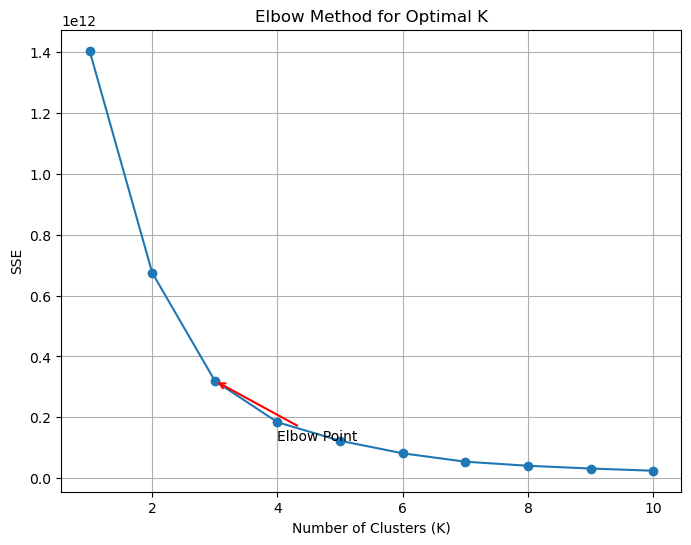

In [25]:
#Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.annotate('Elbow Point', xy=(3, inertia[2]), xytext=(4, inertia[4]), 
             arrowprops=dict(arrowstyle='->', lw=1.5, color='red'))
plt.grid(True)
plt.show()

In [26]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=3)
cluster_data = agglomerative.fit_predict(df)
print(cluster_data)


[0 0 0 ... 0 0 0]


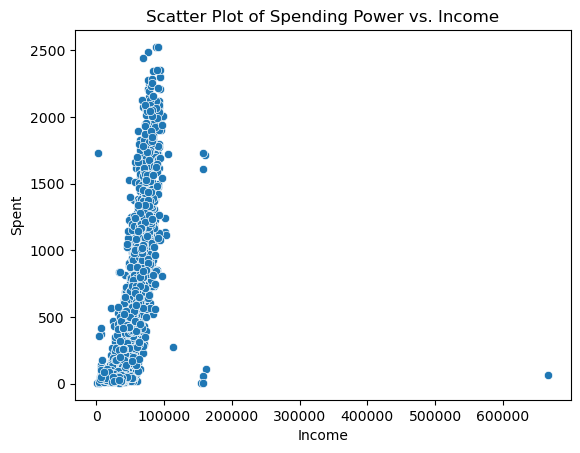

In [27]:
#Scatterplot
sns.scatterplot(data=df , x='Income', y='Spent')
plt.title('Scatter Plot of Spending Power vs. Income')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()


c:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


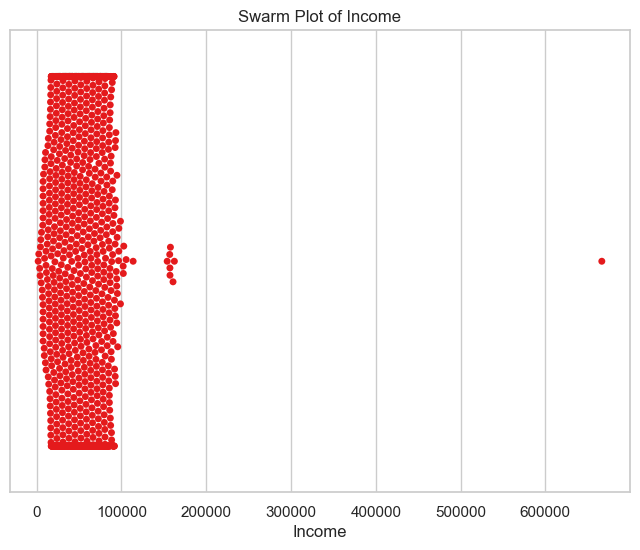

In [28]:
#Swarmplot
import numpy as np
sns.set(style="whitegrid") 
plt.figure(figsize=(8, 6))  
sns.swarmplot(data=df, x='Income', palette='Set1') 
plt.title("Swarm Plot of Income")  
plt.xlabel("Income") 
plt.show()

c:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


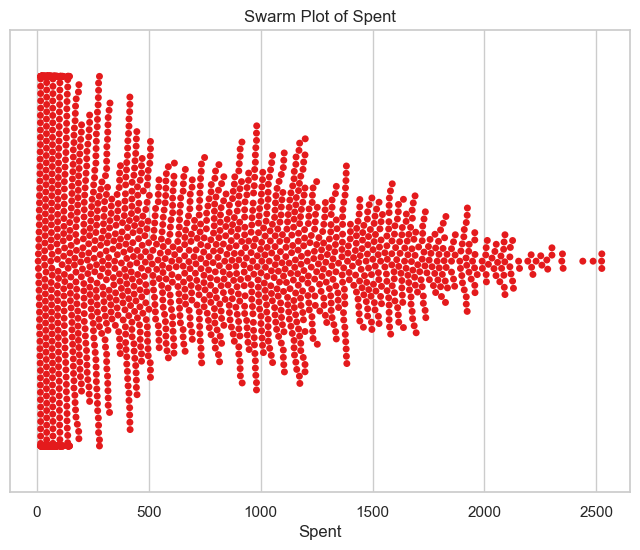

In [ ]:
#Swarmplot
import numpy as np
sns.set(style="whitegrid") 
plt.figure(figsize=(8, 6))  
sns.swarmplot(data=df, x='Spent', palette='Set1') 
plt.title("Swarm Plot of Spent")  
plt.xlabel("Spent") 
plt.show()

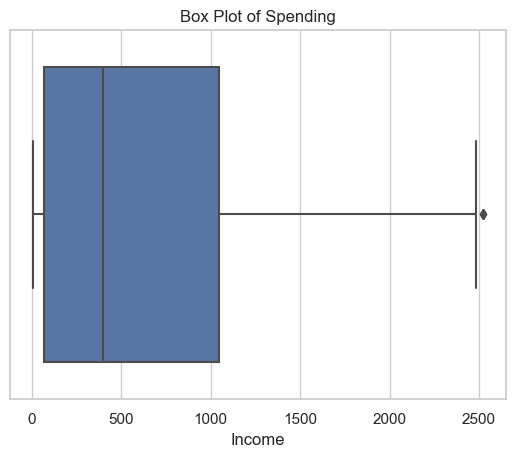

In [35]:
#boxenplot
sns.boxplot(x='Spent', data=df)
plt.xlabel('Income')
plt.title('Box Plot of Spending')
plt.show()

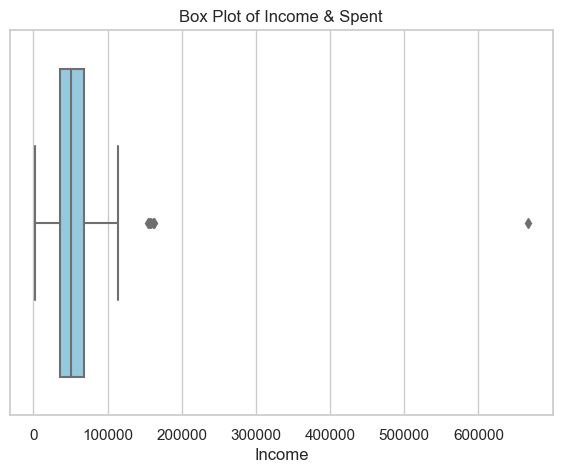

In [ ]:
#boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(x=df ['Income'], color='skyblue')
plt.title('Box Plot of Income')
plt.show()

c:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points cann

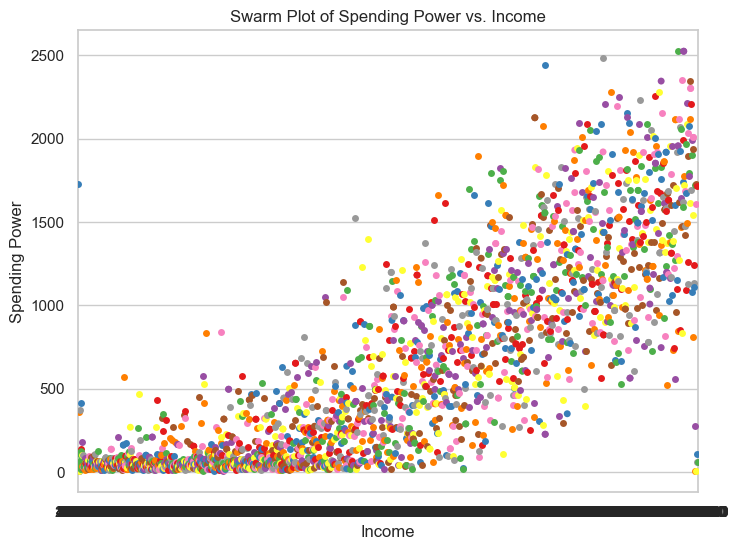

In [47]:
#Swarmplot
sns.set(style="whitegrid") 
plt.figure(figsize=(8, 6))  

sns.swarmplot(data=df, x='Income', y='Spent', palette='Set1') 
plt.title("Swarm Plot of Spending Power vs. Income")  
plt.xlabel("Income") 
plt.ylabel("Spending Power") 
plt.show()